# Project: Wrangling and Analyze Data

In [59]:
#import all the libraries needed for analysis
import pandas as pd
import numpy as np
import tweepy as tw
import requests
import json
import os
import config
import time
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Data Gathering
In the cell below, I gathered **all** three pieces of data for this project and load them in the notebook. **Note:** the methods used to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
# Gathering the twitter_archive data
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
# Gathering image_predictions.tsv using request library
url='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
images = requests.get(url)
with open("image_predictions.tsv", mode='wb') as file:
    file.write(images.content)
    
image_predictions = pd.read_csv('image_predictions.tsv', sep='\t')

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [4]:
#authenticate twitter API access token
auth = tw.OAuthHandler(config.consumer_key, config.consumer_secret)
auth.set_access_token(config.access_token, config.access_secret)
api = tw.API(auth, wait_on_rate_limit=True)

In [5]:
# Represent tweet_id as list
list(twitter_archive.tweet_id)

[892420643555336193,
 892177421306343426,
 891815181378084864,
 891689557279858688,
 891327558926688256,
 891087950875897856,
 890971913173991426,
 890729181411237888,
 890609185150312448,
 890240255349198849,
 890006608113172480,
 889880896479866881,
 889665388333682689,
 889638837579907072,
 889531135344209921,
 889278841981685760,
 888917238123831296,
 888804989199671297,
 888554962724278272,
 888202515573088257,
 888078434458587136,
 887705289381826560,
 887517139158093824,
 887473957103951883,
 887343217045368832,
 887101392804085760,
 886983233522544640,
 886736880519319552,
 886680336477933568,
 886366144734445568,
 886267009285017600,
 886258384151887873,
 886054160059072513,
 885984800019947520,
 885528943205470208,
 885518971528720385,
 885311592912609280,
 885167619883638784,
 884925521741709313,
 884876753390489601,
 884562892145688576,
 884441805382717440,
 884247878851493888,
 884162670584377345,
 883838122936631299,
 883482846933004288,
 883360690899218434,
 883117836046

In [6]:
# Check the length of tweet_id
len(list(twitter_archive.tweet_id))

2356

In [7]:
# Define a variable called tweets_ids to gather additonal data via Twitter's API
tweets_ids = twitter_archive.tweet_id.values
tweets_ids

array([892420643555336193, 892177421306343426, 891815181378084864, ...,
       666033412701032449, 666029285002620928, 666020888022790149],
      dtype=int64)

In [8]:
# Check the length of tweets_ids to confirm it matches that of twitter_archive.tweet_id
len(tweets_ids)

2356

In [10]:
# Query Twitter's API for the JSON data of each tweet ID in the Twitter archive
index = 0
# dictionary to catch the errors
errors = {}
start = time.time()

# Save each tweet's returned JSON as a new line in a .txt file
with open ('tweet_json.txt', mode='w') as tweets:
    # This will likely take time to run due of Twitter's rate limit
    for tweet_id in tweets_ids:
        index += 1
        try:
            # Get the status data for each of the tweet IDs
            tweet = api.get_status(tweet_id, tweet_mode = 'extended')
            print(str(index) + ". " + "ID - " + str(tweet_id))
            # Convert each tweet status to JSON string and save it in the tweet_bk file
            json.dump(tweet._json, tweets)
            # recognize \n as a break of text
            tweets.write("\n")
            
        # Catching errors that might occur while accessing the tweet data or content
        except tw.TweepyException as error:
            print(str(index) + ". " + "ID - " + str(tweet_id) + " has an error:", error.response.text)
            # Appending the errors to the dictionary; error_dict
            errors[tweet_id] = error
            
end = time.time()
print(end - start)

1. ID - 892420643555336193
2. ID - 892177421306343426
3. ID - 891815181378084864
4. ID - 891689557279858688
5. ID - 891327558926688256
6. ID - 891087950875897856
7. ID - 890971913173991426
8. ID - 890729181411237888
9. ID - 890609185150312448
10. ID - 890240255349198849
11. ID - 890006608113172480
12. ID - 889880896479866881
13. ID - 889665388333682689
14. ID - 889638837579907072
15. ID - 889531135344209921
16. ID - 889278841981685760
17. ID - 888917238123831296
18. ID - 888804989199671297
19. ID - 888554962724278272
20. ID - 888202515573088257 has an error: {"errors":[{"code":144,"message":"No status found with that ID."}]}
21. ID - 888078434458587136
22. ID - 887705289381826560
23. ID - 887517139158093824
24. ID - 887473957103951883
25. ID - 887343217045368832
26. ID - 887101392804085760
27. ID - 886983233522544640
28. ID - 886736880519319552
29. ID - 886680336477933568
30. ID - 886366144734445568
31. ID - 886267009285017600
32. ID - 886258384151887873
33. ID - 886054160059072513
34.

254. ID - 844704788403113984 has an error: {"errors":[{"code":144,"message":"No status found with that ID."}]}
255. ID - 844580511645339650
256. ID - 844223788422217728
257. ID - 843981021012017153
258. ID - 843856843873095681
259. ID - 843604394117681152
260. ID - 843235543001513987
261. ID - 842892208864923648 has an error: {"errors":[{"code":144,"message":"No status found with that ID."}]}
262. ID - 842846295480000512
263. ID - 842765311967449089
264. ID - 842535590457499648
265. ID - 842163532590374912
266. ID - 842115215311396866
267. ID - 841833993020538882
268. ID - 841680585030541313
269. ID - 841439858740625411
270. ID - 841320156043304961
271. ID - 841314665196081154
272. ID - 841077006473256960
273. ID - 840761248237133825
274. ID - 840728873075638272
275. ID - 840698636975636481
276. ID - 840696689258311684
277. ID - 840632337062862849
278. ID - 840370681858686976
279. ID - 840268004936019968
280. ID - 839990271299457024
281. ID - 839549326359670784
282. ID - 83929060051192

517. ID - 810984652412424192
518. ID - 810896069567610880
519. ID - 810657578271330305
520. ID - 810284430598270976
521. ID - 810254108431155201
522. ID - 809920764300447744
523. ID - 809808892968534016
524. ID - 809448704142938112
525. ID - 809220051211603969
526. ID - 809084759137812480
527. ID - 808838249661788160
528. ID - 808733504066486276
529. ID - 808501579447930884
530. ID - 808344865868283904
531. ID - 808134635716833280
532. ID - 808106460588765185
533. ID - 808001312164028416
534. ID - 807621403335917568
535. ID - 807106840509214720
536. ID - 807059379405148160
537. ID - 807010152071229440
538. ID - 806629075125202948
539. ID - 806620845233815552
540. ID - 806576416489959424
541. ID - 806542213899489280
542. ID - 806242860592926720
543. ID - 806219024703037440
544. ID - 805958939288408065
545. ID - 805932879469572096
546. ID - 805826884734976000
547. ID - 805823200554876929
548. ID - 805520635690676224
549. ID - 805487436403003392
550. ID - 805207613751304193
551. ID - 8047

792. ID - 773704687002451968
793. ID - 773670353721753600
794. ID - 773547596996571136
795. ID - 773336787167145985
796. ID - 773308824254029826
797. ID - 773247561583001600
798. ID - 773191612633579521
799. ID - 772877495989305348
800. ID - 772826264096874500
801. ID - 772615324260794368
802. ID - 772581559778025472
803. ID - 772193107915964416
804. ID - 772152991789019136
805. ID - 772117678702071809
806. ID - 772114945936949249
807. ID - 772102971039580160
808. ID - 771908950375665664
809. ID - 771770456517009408
810. ID - 771500966810099713
811. ID - 771380798096281600
812. ID - 771171053431250945
813. ID - 771136648247640064
814. ID - 771102124360998913
815. ID - 771014301343748096
816. ID - 771004394259247104 has an error: {"errors":[{"code":179,"message":"Sorry, you are not authorized to see this status."}]}
817. ID - 770787852854652928
818. ID - 770772759874076672
819. ID - 770743923962707968 has an error: {"errors":[{"code":144,"message":"No status found with that ID."}]}
820.

Rate limit reached. Sleeping for: 247


881. ID - 760539183865880579
882. ID - 760521673607086080
883. ID - 760290219849637889
884. ID - 760252756032651264
885. ID - 760190180481531904
886. ID - 760153949710192640
887. ID - 759943073749200896
888. ID - 759923798737051648 has an error: {"errors":[{"code":144,"message":"No status found with that ID."}]}
889. ID - 759846353224826880
890. ID - 759793422261743616
891. ID - 759566828574212096 has an error: {"errors":[{"code":144,"message":"No status found with that ID."}]}
892. ID - 759557299618865152
893. ID - 759447681597108224
894. ID - 759446261539934208
895. ID - 759197388317847553
896. ID - 759159934323924993
897. ID - 759099523532779520
898. ID - 759047813560868866
899. ID - 758854675097526272
900. ID - 758828659922702336
901. ID - 758740312047005698
902. ID - 758474966123810816
903. ID - 758467244762497024
904. ID - 758405701903519748
905. ID - 758355060040593408
906. ID - 758099635764359168
907. ID - 758041019896193024
908. ID - 757741869644341248
909. ID - 75772916377629

1150. ID - 726828223124897792
1151. ID - 726224900189511680
1152. ID - 725842289046749185
1153. ID - 725786712245440512
1154. ID - 725729321944506368
1155. ID - 725458796924002305
1156. ID - 724983749226668032
1157. ID - 724771698126512129
1158. ID - 724405726123311104
1159. ID - 724049859469295616
1160. ID - 724046343203856385
1161. ID - 724004602748780546
1162. ID - 723912936180330496
1163. ID - 723688335806480385
1164. ID - 723673163800948736
1165. ID - 723179728551723008
1166. ID - 722974582966214656
1167. ID - 722613351520608256
1168. ID - 721503162398597120
1169. ID - 721001180231503872
1170. ID - 720785406564900865
1171. ID - 720775346191278080
1172. ID - 720415127506415616
1173. ID - 720389942216527872
1174. ID - 720340705894408192
1175. ID - 720059472081784833
1176. ID - 720043174954147842
1177. ID - 719991154352222208
1178. ID - 719704490224398336
1179. ID - 719551379208073216
1180. ID - 719367763014393856
1181. ID - 719339463458033665
1182. ID - 719332531645071360
1183. ID -

1424. ID - 697995514407682048
1425. ID - 697990423684476929
1426. ID - 697943111201378304
1427. ID - 697881462549430272
1428. ID - 697630435728322560
1429. ID - 697616773278015490
1430. ID - 697596423848730625
1431. ID - 697575480820686848
1432. ID - 697516214579523584
1433. ID - 697482927769255936
1434. ID - 697463031882764288
1435. ID - 697270446429966336
1436. ID - 697259378236399616
1437. ID - 697255105972801536
1438. ID - 697242256848379904
1439. ID - 696900204696625153
1440. ID - 696894894812565505
1441. ID - 696886256886657024
1442. ID - 696877980375769088
1443. ID - 696754882863349760
1444. ID - 696744641916489729
1445. ID - 696713835009417216
1446. ID - 696518437233913856
1447. ID - 696490539101908992
1448. ID - 696488710901260288
1449. ID - 696405997980676096
1450. ID - 696100768806522880
1451. ID - 695816827381944320
1452. ID - 695794761660297217
1453. ID - 695767669421768709
1454. ID - 695629776980148225
1455. ID - 695446424020918272
1456. ID - 695409464418041856
1457. ID -

1698. ID - 681231109724700672
1699. ID - 681193455364796417
1700. ID - 680970795137544192
1701. ID - 680959110691590145
1702. ID - 680940246314430465
1703. ID - 680934982542561280
1704. ID - 680913438424612864
1705. ID - 680889648562991104
1706. ID - 680836378243002368
1707. ID - 680805554198020098
1708. ID - 680801747103793152
1709. ID - 680798457301471234
1710. ID - 680609293079592961
1711. ID - 680583894916304897
1712. ID - 680497766108381184
1713. ID - 680494726643068929
1714. ID - 680473011644985345
1715. ID - 680440374763077632
1716. ID - 680221482581123072
1717. ID - 680206703334408192
1718. ID - 680191257256136705
1719. ID - 680176173301628928
1720. ID - 680161097740095489
1721. ID - 680145970311643136
1722. ID - 680130881361686529
1723. ID - 680115823365742593
1724. ID - 680100725817409536
1725. ID - 680085611152338944
1726. ID - 680070545539371008
1727. ID - 680055455951884288 has an error: {"errors":[{"code":144,"message":"No status found with that ID."}]}
1728. ID - 6798770

Rate limit reached. Sleeping for: 323


1781. ID - 677700003327029250
1782. ID - 677698403548192770
1783. ID - 677687604918272002
1784. ID - 677673981332312066
1785. ID - 677662372920729601
1786. ID - 677644091929329666
1787. ID - 677573743309385728
1788. ID - 677565715327688705
1789. ID - 677557565589463040
1790. ID - 677547928504967168
1791. ID - 677530072887205888
1792. ID - 677335745548390400
1793. ID - 677334615166730240
1794. ID - 677331501395156992
1795. ID - 677328882937298944
1796. ID - 677314812125323265
1797. ID - 677301033169788928
1798. ID - 677269281705472000
1799. ID - 677228873407442944
1800. ID - 677187300187611136
1801. ID - 676975532580409345
1802. ID - 676957860086095872
1803. ID - 676949632774234114
1804. ID - 676948236477857792
1805. ID - 676946864479084545
1806. ID - 676942428000112642
1807. ID - 676936541936185344
1808. ID - 676916996760600576
1809. ID - 676897532954456065
1810. ID - 676864501615042560
1811. ID - 676821958043033607
1812. ID - 676819651066732545
1813. ID - 676811746707918848
1814. ID -

2055. ID - 671390180817915904
2056. ID - 671362598324076544
2057. ID - 671357843010908160
2058. ID - 671355857343524864
2059. ID - 671347597085433856
2060. ID - 671186162933985280
2061. ID - 671182547775299584
2062. ID - 671166507850801152
2063. ID - 671163268581498880
2064. ID - 671159727754231808
2065. ID - 671154572044468225
2066. ID - 671151324042559489
2067. ID - 671147085991960577
2068. ID - 671141549288370177
2069. ID - 671138694582165504
2070. ID - 671134062904504320
2071. ID - 671122204919246848
2072. ID - 671115716440031232
2073. ID - 671109016219725825
2074. ID - 670995969505435648
2075. ID - 670842764863651840
2076. ID - 670840546554966016
2077. ID - 670838202509447168
2078. ID - 670833812859932673
2079. ID - 670832455012716544
2080. ID - 670826280409919488
2081. ID - 670823764196741120
2082. ID - 670822709593571328
2083. ID - 670815497391357952
2084. ID - 670811965569282048
2085. ID - 670807719151067136
2086. ID - 670804601705242624
2087. ID - 670803562457407488
2088. ID -

2329. ID - 666396247373291520
2330. ID - 666373753744588802
2331. ID - 666362758909284353
2332. ID - 666353288456101888
2333. ID - 666345417576210432
2334. ID - 666337882303524864
2335. ID - 666293911632134144
2336. ID - 666287406224695296
2337. ID - 666273097616637952
2338. ID - 666268910803644416
2339. ID - 666104133288665088
2340. ID - 666102155909144576
2341. ID - 666099513787052032
2342. ID - 666094000022159362
2343. ID - 666082916733198337
2344. ID - 666073100786774016
2345. ID - 666071193221509120
2346. ID - 666063827256086533
2347. ID - 666058600524156928
2348. ID - 666057090499244032
2349. ID - 666055525042405380
2350. ID - 666051853826850816
2351. ID - 666050758794694657
2352. ID - 666049248165822465
2353. ID - 666044226329800704
2354. ID - 666033412701032449
2355. ID - 666029285002620928
2356. ID - 666020888022790149
2123.559661388397


In [11]:
# Display the errors
print(errors)

{888202515573088257: NotFound('404 Not Found\n144 - No status found with that ID.'), 873697596434513921: NotFound('404 Not Found\n144 - No status found with that ID.'), 872668790621863937: NotFound('404 Not Found\n144 - No status found with that ID.'), 872261713294495745: NotFound('404 Not Found\n144 - No status found with that ID.'), 869988702071779329: NotFound('404 Not Found\n144 - No status found with that ID.'), 866816280283807744: NotFound('404 Not Found\n144 - No status found with that ID.'), 861769973181624320: NotFound('404 Not Found\n144 - No status found with that ID.'), 856602993587888130: NotFound('404 Not Found\n144 - No status found with that ID.'), 856330835276025856: NotFound('404 Not Found\n144 - No status found with that ID.'), 851953902622658560: NotFound('404 Not Found\n144 - No status found with that ID.'), 851861385021730816: NotFound('404 Not Found\n144 - No status found with that ID.'), 845459076796616705: NotFound('404 Not Found\n144 - No status found with tha

In [12]:
# Extract the remaining missing columns from enhanced twitter archive

# Create an empty list to convert to a DataFrame
errors_list = []

# Open text file for reading
with open ('tweet_json.txt', 'r') as json_file:
    for line in json_file.readlines():
        tweet_line = json.loads(line)
        tweet_id = tweet_line['id']
        retwt_count = tweet_line['retweet_count']
        fav_count = tweet_line['favorite_count']
        follows_count = tweet_line['user']['followers_count']
        frnds_count = tweet_line['user']['friends_count']
        
        errors_list.append({'id': tweet_id,
                       'retweet_count': retwt_count,
                       'favorite_count': fav_count,
                       'followers_count': follows_count,
                       'friends_count': frnds_count})
        
tweet_json = pd.DataFrame(errors_list, columns=['id', 'retweet_count', 'favorite_count', 'followers_count', 'friends_count'])

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



## Visual Assessment
> Display each data frames for visual assessment

In [13]:
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [14]:
image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [15]:
tweet_json

,id,retweet_count,favorite_count,followers_count,friends_count
0,892420643555336193,7009,33810,9285651,21
1,892177421306343426,5301,29330,9285651,21
2,891815181378084864,3481,22050,9285651,21
3,891689557279858688,7225,36939,9285651,21
4,891327558926688256,7760,35311,9285651,21
...,...,...,...,...,...
2322,666049248165822465,37,89,9285657,21
2323,666044226329800704,115,247,9285657,21
2324,666033412701032449,36,100,9285657,21
2325,666029285002620928,39,112,9285657,21


## Programmatic Assessment
> Using pandas functions and methods for programmatic assessment

In [16]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [17]:
twitter_archive.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [18]:
twitter_archive.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2136,670055038660800512,NaN,NaN,2015-11-27 01:42:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tommy. He's a cool dog. Hard not to st...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670055038...,3,10,Tommy,None,None,None,None
37,885167619883638784,NaN,NaN,2017-07-12 16:03:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a corgi undercover as a malamute....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/885167619...,13,10,None,None,None,None,None
2053,671485057807351808,NaN,NaN,2015-12-01 00:24:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Penelope. She is a white Macadamias Duode...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671485057...,11,10,Penelope,None,None,None,None
2309,666804364988780544,NaN,NaN,2015-11-18 02:25:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jockson. He is a Pinnacle Sagittarius....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666804364...,8,10,Jockson,None,None,None,None
1159,724046343203856385,NaN,NaN,2016-04-24 01:24:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sarge. Not even he knows what his tong...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/724046343...,10,10,Sarge,None,None,None,None
1167,721503162398597120,NaN,NaN,2016-04-17 00:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Panda. He's happy af. 11/10 https://t....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/721503162...,11,10,Panda,None,None,None,None
1938,673906403526995968,NaN,NaN,2015-12-07 16:46:21 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Guys I'm getting real tired of this. We only r...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673906403...,3,10,None,None,None,None,None
581,800443802682937345,NaN,NaN,2016-11-20 21:00:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Sampson. He's about to ...,7.761133e+17,4.196984e+09,2016-09-14 17:40:06 +0000,https://twitter.com/dog_rates/status/776113305...,11,10,Sampson,None,None,pupper,None
1932,674024893172875264,NaN,NaN,2015-12-08 00:37:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you realize it doesn't matter how hard yo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674024893...,10,10,None,None,None,None,None
1803,676948236477857792,NaN,NaN,2015-12-16 02:13:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Karl. Karl thinks he's slick. 6/10 sne...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/676948236...,6,10,Karl,None,None,None,None


In [19]:
# Check if there is any duplicated rows
twitter_archive.duplicated().sum()

0

In [20]:
# Check the descriptive statistics
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [21]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [22]:
image_predictions.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [23]:
image_predictions.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1003,708834316713893888,https://pbs.twimg.com/media/CdZI_bpWEAAm1fs.jpg,1,Eskimo_dog,0.283945,True,giant_panda,0.218252,False,malamute,0.180401,True
180,669327207240699904,https://pbs.twimg.com/media/CUntin8WIAADmLk.jpg,1,golden_retriever,0.919584,True,Labrador_retriever,0.049669,True,kuvasz,0.010216,True
23,666345417576210432,https://pbs.twimg.com/media/CT9Vn7PWoAA_ZCM.jpg,1,golden_retriever,0.858744,True,Chesapeake_Bay_retriever,0.054787,True,Labrador_retriever,0.014241,True
1320,756288534030475264,https://pbs.twimg.com/media/Cn7gaHrWIAAZJMt.jpg,3,conch,0.925621,False,French_bulldog,0.032492,True,tiger_cat,0.006679,False
337,672231046314901505,https://pbs.twimg.com/media/CVQ-kfWWoAAXV15.jpg,1,killer_whale,0.823919,False,grey_whale,0.036601,False,hammerhead,0.029522,False
726,686358356425093120,https://pbs.twimg.com/media/CYZvRttWYAE_RXc.jpg,1,pug,0.985237,True,bull_mastiff,0.008841,True,boxer,0.002321,True
1520,787810552592695296,https://pbs.twimg.com/media/Cu7dg2RXYAIaGXE.jpg,2,pug,0.362835,True,French_bulldog,0.221864,True,English_setter,0.080418,True
1013,709556954897764353,https://pbs.twimg.com/media/CdjaSFCWAAAJZh3.jpg,2,golden_retriever,0.790026,True,kuvasz,0.105031,True,Labrador_retriever,0.087051,True
1116,725729321944506368,https://pbs.twimg.com/media/ChJO9YaWYAEL0zC.jpg,1,boxer,0.599076,True,bull_mastiff,0.177318,True,French_bulldog,0.141461,True
813,692535307825213440,https://pbs.twimg.com/media/CZxhL2yWAAI_DHn.jpg,1,pug,0.413090,True,French_bulldog,0.199865,True,Chihuahua,0.081991,True


In [24]:
# Check if there is any duplicated rows
image_predictions.duplicated().sum()

0

In [25]:
# Check the descriptive statistics
image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [26]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   id               2327 non-null   int64
 1   retweet_count    2327 non-null   int64
 2   favorite_count   2327 non-null   int64
 3   followers_count  2327 non-null   int64
 4   friends_count    2327 non-null   int64
dtypes: int64(5)
memory usage: 91.0 KB


In [27]:
tweet_json.isnull().sum()

id                 0
retweet_count      0
favorite_count     0
followers_count    0
friends_count      0
dtype: int64

In [28]:
tweet_json.sample(10)

,id,retweet_count,favorite_count,followers_count,friends_count
1718,679111216690831360,2315,5443,9285657,21
151,861005113778896900,3339,14998,9285651,21
2316,666063827256086533,180,399,9285657,21
2321,666050758794694657,50,115,9285657,21
619,793256262322548741,7812,18950,9285653,21
412,821044531881721856,2126,11966,9285654,21
1932,673359818736984064,594,1288,9285657,21
709,781955203444699136,3138,10571,9285653,21
156,860276583193509888,3074,16593,9285651,21
388,823719002937630720,10369,0,9285654,21


In [29]:
# Check if there is any duplicated rows
tweet_json.duplicated().sum()

0

In [30]:
# Check the descriptive statistics
tweet_json.describe()

,id,retweet_count,favorite_count,followers_count,friends_count
count,2.327000e+03,2327.000000,2327.000000,2.327000e+03,2327.0
mean,7.417930e+17,2471.180920,7054.505801,9.285663e+06,21.0
std,6.820795e+16,4185.111607,10962.893563,6.006795e+01,0.0
min,6.660209e+17,1.000000,0.000000,9.285651e+06,21.0
25%,6.781394e+17,494.500000,1225.500000,9.285654e+06,21.0
50%,7.178418e+17,1149.000000,3050.000000,9.285655e+06,21.0
75%,7.986547e+17,2860.500000,8604.500000,9.285656e+06,21.0
max,8.924206e+17,70739.000000,144890.000000,9.286120e+06,21.0


### Quality issues


#### `twitter_archive` table
    
    1. Erroneous datatype(timestamp column datatype is object instead of datatime datatype)

    2. Erroneous datatype(tweet_id column datatype is int instead of object datatype)

    3. Dog's names with all lowercases are incorrect
    
    4. tweet_id 885518971528720385's name is incorrect

    5. in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp contains mostly missing values

#### `image_predictions` table

    6. Erroneous datatype(tweet_id column datatype is int instead of object datatype)

    7. inconsistent data format for p1, p2, p3 columns
    

#### `tweet_json` table

    8. Erroneous datatype(tweet_id column datatype is int instead of object datatype)
    
    


### Tidiness issues
    1. merge all tables into one single table

    2. tweet_json table 'id' column name should be 'tweet_id' to match the other two tables

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [31]:
# Make copies of original pieces of data
twitter_archive_clean = twitter_archive.copy()
image_predictions_clean = image_predictions.copy()
tweet_json_clean = tweet_json.copy()

### Issue #1: 

Erroneous datatype(timestamp column datatype is int instead of object datatype)

#### Define:  

Convert the column data type to datatime

#### Code

In [32]:
# change timestamp datatype to datatime
twitter_archive_clean['timestamp'] = pd.to_datetime(twitter_archive_clean['timestamp'])

#### Test

In [33]:
# Check if timestamp datatype is now datetime
twitter_archive_clean['timestamp'].dtypes

datetime64[ns, UTC]

### Issue #2:

Erroneous datatype(tweet_id column datatype is int instead of object datatype)

#### Define:

Convert the column data type to string

#### Code

In [34]:
# change tweet_id datatype to str
twitter_archive_clean['tweet_id'] = twitter_archive_clean['tweet_id'].astype(str)

#### Test

In [35]:
# Check if tweet_id datatype is object
twitter_archive_clean.dtypes

tweet_id                                   object
in_reply_to_status_id                     float64
in_reply_to_user_id                       float64
timestamp                     datetime64[ns, UTC]
source                                     object
text                                       object
retweeted_status_id                       float64
retweeted_status_user_id                  float64
retweeted_status_timestamp                 object
expanded_urls                              object
rating_numerator                            int64
rating_denominator                          int64
name                                       object
doggo                                      object
floofer                                    object
pupper                                     object
puppo                                      object
dtype: object

### Issue #3:

Dog's names with all lowercases are incorrect

#### Define

Drop all names that include all lowercases and replace with 'None'

#### Code

In [36]:
# Put all the names that begins with lowercase inside a list
wrong_name = []

for i in twitter_archive_clean.name:
    if i.islower() and i not in wrong_name:
        wrong_name.append(i)


# Check to see names that begins with lowercase letters
print(wrong_name)

['such', 'a', 'quite', 'not', 'one', 'incredibly', 'mad', 'an', 'very', 'just', 'my', 'his', 'actually', 'getting', 'this', 'unacceptable', 'all', 'old', 'infuriating', 'the', 'by', 'officially', 'life', 'light', 'space']


In [37]:
# Replace the names with None
twitter_archive_clean.replace(wrong_name, 'None', inplace=True)

#### Test

In [38]:
# Sample from edited 'name' and run a few times
twitter_archive_clean['name'].sample(10)

1054        Bell
1867        None
377       Brutus
1946         Dot
1939        None
766         None
1129    Pupcasso
1780       Ralph
1773    Jessifer
583           Bo
Name: name, dtype: object

### Issue #4:

tweet_id 885518971528720385's name is incorrect

#### Define:

Change tweet_id 885518971528720385's name from None to Howard

#### Code

In [39]:
# Check for the index of tweet_id 885518971528720385
twitter_archive_clean.head(39)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40+00:00,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [40]:
# Use the at() method to update the value of the row
twitter_archive_clean.at[35, 'name'] = 'Howard'

#### Test

In [41]:
# Check to see if the name have been updated
twitter_archive_clean.query('name == "Howard"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
35,885518971528720385,NaN,NaN,2017-07-13 15:19:09+00:00,"<a href=""http://twitter.com/download/iphone"" r...",I have a new hero and his name is Howard. 14/1...,NaN,NaN,NaN,https://twitter.com/4bonds2carbon/status/88551...,14,10,Howard,None,None,None,None


### Issue #5:

in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp contains mostly missing values

#### Define:

Drop the following columns as it contains mostly missing values and won't be needed for our analysis, in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp.

#### Code

In [42]:
# Drop the columns listed above
twitter_archive_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1, inplace=True)

#### Test

In [43]:
# Check to see the result
twitter_archive_clean.head(2)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


### Issue #6:

Erroneous datatype(tweet_id column datatype is int instead of object datatype)


#### Define:

Convert the column data type to string

#### Code

In [44]:
# change tweet_id datatype to str
image_predictions_clean['tweet_id'] = image_predictions_clean['tweet_id'].astype(str)

#### Test

In [45]:
image_predictions_clean.dtypes

tweet_id     object
jpg_url      object
img_num       int64
p1           object
p1_conf     float64
p1_dog         bool
p2           object
p2_conf     float64
p2_dog         bool
p3           object
p3_conf     float64
p3_dog         bool
dtype: object

### Issue #7: 

Inconsistent data format for p1, p2, p3 columns

#### Define:

Change all the values for p1, p2, p3 to lowercase

#### Code

In [46]:
# Change all the values for p1, p2, p3 to lowercase
image_predictions_clean['p1'] = image_predictions_clean['p1'].str.lower()
image_predictions_clean['p2'] = image_predictions_clean['p2'].str.lower()
image_predictions_clean['p3'] = image_predictions_clean['p3'].str.lower()

#### Test

In [47]:
# Check if the values of p1, p2, p3 are now lowercase
image_predictions_clean.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1320,756288534030475264,https://pbs.twimg.com/media/Cn7gaHrWIAAZJMt.jpg,3,conch,0.925621,False,french_bulldog,0.032492,True,tiger_cat,0.006679,False
2049,887101392804085760,https://pbs.twimg.com/media/DE-eAq6UwAA-jaE.jpg,1,samoyed,0.733942,True,eskimo_dog,0.035029,True,staffordshire_bullterrier,0.029705,True
834,694001791655137281,https://pbs.twimg.com/media/CaGW8JQUMAEVtLl.jpg,1,pembroke,0.769999,True,cardigan,0.229228,True,chihuahua,0.000247,True
631,680940246314430465,https://pbs.twimg.com/media/CXMvio7WQAAPZJj.jpg,1,soft-coated_wheaten_terrier,0.289598,True,west_highland_white_terrier,0.157195,True,toy_poodle,0.074435,True
2000,876120275196170240,https://pbs.twimg.com/media/DCiavj_UwAAcXep.jpg,1,bernese_mountain_dog,0.534327,True,saint_bernard,0.346312,True,greater_swiss_mountain_dog,0.094933,True
20,666287406224695296,https://pbs.twimg.com/media/CT8g3BpUEAAuFjg.jpg,1,maltese_dog,0.857531,True,toy_poodle,0.063064,True,miniature_poodle,0.025581,True
34,666435652385423360,https://pbs.twimg.com/media/CT-nsTQWEAEkyDn.jpg,1,chesapeake_bay_retriever,0.184130,True,chain_saw,0.056775,False,power_drill,0.036763,False
118,668154635664932864,https://pbs.twimg.com/media/CUXDGR2WcAAUQKz.jpg,1,arctic_fox,0.473584,False,wallaby,0.261411,False,white_wolf,0.080948,False
1732,821149554670182400,https://pbs.twimg.com/ext_tw_video_thumb/82114...,1,german_shepherd,0.515933,True,malinois,0.203651,True,irish_setter,0.091055,True
1784,829141528400556032,https://pbs.twimg.com/media/C4GzztSWAAA_qi4.jpg,2,golden_retriever,0.573140,True,cocker_spaniel,0.111159,True,gibbon,0.094127,False


### Issue #8: 

Erroneous datatype(id column datatype is int instead of object datatype)

#### Define:

Convert the column data type to string

#### Code

In [48]:
# change id datatype to str
tweet_json_clean['id'] = tweet_json_clean['id'].astype(str)

#### Test

In [49]:
tweet_json_clean.dtypes

id                 object
retweet_count       int64
favorite_count      int64
followers_count     int64
friends_count       int64
dtype: object

### Issue #9:

tweet_json table 'id' column name should be 'tweet_id' to match the other two tables

#### Define:

Rename the column name from 'id' to 'tweet_id'

#### Code

In [50]:
tweet_json_clean.rename(columns={'id': 'tweet_id'}, inplace=True)

#### Test

In [51]:
tweet_json_clean.head()

,tweet_id,retweet_count,favorite_count,followers_count,friends_count
0,892420643555336193,7009,33810,9285651,21
1,892177421306343426,5301,29330,9285651,21
2,891815181378084864,3481,22050,9285651,21
3,891689557279858688,7225,36939,9285651,21
4,891327558926688256,7760,35311,9285651,21


### Issue #10:

Merge all tables into one single table

#### Define:

Merge all the tables using tweet_id column

#### Code

In [52]:
# Merge two dataset first
df_1 = twitter_archive_clean.merge(tweet_json_clean, on='tweet_id', how='outer')

In [53]:
# Merge the 3 data set
df = df_1.merge(image_predictions_clean, on='tweet_id', how='outer')

#### Test

In [54]:
# Check the result of the merger
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2356 non-null   object             
 1   timestamp           2356 non-null   datetime64[ns, UTC]
 2   source              2356 non-null   object             
 3   text                2356 non-null   object             
 4   expanded_urls       2297 non-null   object             
 5   rating_numerator    2356 non-null   int64              
 6   rating_denominator  2356 non-null   int64              
 7   name                2356 non-null   object             
 8   doggo               2356 non-null   object             
 9   floofer             2356 non-null   object             
 10  pupper              2356 non-null   object             
 11  puppo               2356 non-null   object             
 12  retweet_count       2327 non-null 

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [55]:
# Saving the master dataset to a csv file
df.to_csv("twitter_archive_master.csv", index=False)

In [56]:
# Check if it was properly saved
master = pd.read_csv("twitter_archive_master.csv")

In [57]:
master.sample(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
491,813800681631023104,2016-12-27 17:36:16+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Sky. She's learning how to roll her R'...,https://twitter.com/dog_rates/status/813800681...,12,10,Sky,None,None,...,1.0,malamute,0.501159,True,siberian_husky,0.228792,True,eskimo_dog,0.200388,True
2255,667773195014021121,2015-11-20 18:35:10+00:00,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",This is a rare Hungarian Pinot named Jessiga. ...,https://twitter.com/dog_rates/status/667773195...,8,10,None,None,None,...,1.0,west_highland_white_terrier,0.360465,True,pug,0.093494,True,ice_bear,0.069038,False
1175,720043174954147842,2016-04-13 00:17:25+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Neptune. He's a Snowy Swiss Mountain F...,https://twitter.com/dog_rates/status/720043174...,11,10,Neptune,None,None,...,1.0,samoyed,0.954517,True,eskimo_dog,0.029130,True,white_wolf,0.004462,False
244,846042936437604353,2017-03-26 16:55:29+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jarvis. The snow pupsets him. Officially ...,https://twitter.com/dog_rates/status/846042936...,12,10,Jarvis,None,None,...,1.0,golden_retriever,0.961110,True,labrador_retriever,0.016695,True,tibetan_mastiff,0.009082,True
1985,672898206762672129,2015-12-04 22:00:08+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Cheryl AKA Queen Pupper of the Skies. ...,https://twitter.com/dog_rates/status/672898206...,11,10,Cheryl,None,None,...,1.0,motor_scooter,0.835819,False,bobsled,0.035856,False,moped,0.033079,False


## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [58]:
# Viewing the statistical description
master.describe()

,tweet_id,rating_numerator,rating_denominator,retweet_count,favorite_count,followers_count,friends_count,img_num,p1_conf,p2_conf,p3_conf
count,2.356000e+03,2356.000000,2356.000000,2327.000000,2327.000000,2.327000e+03,2327.0,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.427716e+17,13.126486,10.455433,2471.180920,7054.505801,9.285663e+06,21.0,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.856705e+16,45.876648,6.745237,4185.111607,10962.893563,6.006795e+01,0.0,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,0.000000,0.000000,1.000000,0.000000,9.285651e+06,21.0,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.783989e+17,10.000000,10.000000,494.500000,1225.500000,9.285654e+06,21.0,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.196279e+17,11.000000,10.000000,1149.000000,3050.000000,9.285655e+06,21.0,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.993373e+17,12.000000,10.000000,2860.500000,8604.500000,9.285656e+06,21.0,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,1776.000000,170.000000,70739.000000,144890.000000,9.286120e+06,21.0,4.000000,1.000000,4.880140e-01,2.734190e-01


### Insights:

1. The maximum dog rating is 1,776 and the minimum dog rating is 0.

2. The highest retweet for a post is 70,739 and the post with the least retweet is 1.

3. The tweet with the most likes has 144,890 likes and the tweet with the least likes has 0 likes

### Visualization

### Question:

Is there any correlation between retweet_count and favorite_count?

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='retweet_count', ylabel='favorite_count'>

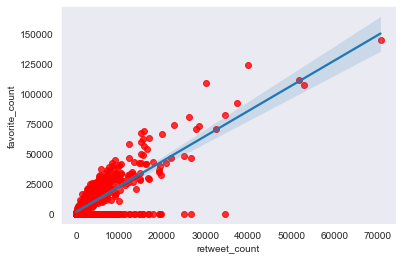

In [61]:
# Using scatter plot to check the correlation
sns.set_style('dark')
sns.regplot(master.retweet_count, master.favorite_count, scatter_kws = {'color': 'Red'})

From the scatter plot above, we can see that there is a positive correlation between retweet_count and favorite_count